In [53]:
import numpy as np 
import os 
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import ColorbarBase 
from astropy.io import fits 
from astropy.table import Table
from astropy.visualization import LinearStretch, PowerStretch 
from astropy.visualization.mpl_normalize import ImageNormalize 
from astropy.visualization import PercentileInterval 
matplotlib.rc('xtick',direction='in') 
matplotlib.rc('ytick',direction='in') 

# PARAMETERS: plotting the fit parameters 
def plotparam(gal, tablename,outfolder=''):
    table = Table.read(tablename, format = 'ascii.ecsv')
    galrows = table[table['GAL_NAME']==gal]
    
    if len(galrows) == 0:
        print (gal + 'has no ringlog in this table')
        return
    twostage=True 
    plotmask=True
    if -1 not in galrows['PAFIT(-1/0/1)']:
        twostage = False
#    if 1 in galrows['BADFLAG']:
#        print (gal + 'is badflagged in this table')
#        return
    ringlog1 = galrows[galrows['PAFIT(-1/0/1)']==1]
#    print(ringlog1)
    if twostage:
        ringlog2 = galrows[galrows['PAFIT(-1/0/1)']==-1]
#    print(ringlog2)
    
    densprof = Table.read(tablename[:-4]+'_densprof.txt', format = 'ascii.ecsv')

    rad = ringlog1['RAD']
    vrot = ringlog1['VROT']
    disp = ringlog1['DISP']
    inc = ringlog1['INC']
    pa = ringlog1['P.A.']
    z0 = ringlog1['Z0']
    xpos = ringlog1['XPOS']
    ypos = ringlog1['YPOS']
    vsys = ringlog1['VSYS']
    vrad = [0]*len(ringlog1)
#    rad,vrot,disp,inc,pa,z0,xpos,ypos,vsys,vrad = np.genfromtxt(file1,skip_header=1,usecols=(1,2,3,4,5,7,9,10,11,12),unpack=True) 
    err1_l, err1_h = np.zeros(shape=(10,len(rad))), np.zeros(shape=(10,len(rad)))
    color=color2='#B22222' 
    max_vrot,max_vdisp,max_inc,max_pa=np.max(vrot),np.max(disp),np.max(inc),np.max(pa) 
    max_z0,max_xpos,max_ypos,max_vsys=np.max(z0),np.max(xpos),np.max(ypos),np.max(vsys) 
    max_rad = 1.1*np.max(rad)
    err1_l[0] = ringlog1['E_VROT1']
    err1_h[0] = ringlog1['E_VROT2']
    err1_l[1] = ringlog1['E_DISP1']
    err1_h[1] = ringlog1['E_DISP2']
    err1_l[5] = ringlog1['E_PA1']
    err1_h[5] = ringlog1['E_PA2']
    err1_l[8] = ringlog1['E_VSYS1']
    err1_h[8] = ringlog1['E_VSYS2']
#    err1_l[0], err1_h[0] = np.genfromtxt(file1,skip_header=1,usecols=(13,14),unpack=True) 
#    err1_l[1], err1_h[1] = np.genfromtxt(file1,skip_header=1,usecols=(15,16),unpack=True) 
#    err1_l[5], err1_h[5] = np.genfromtxt(file1,skip_header=1,usecols=(17,18),unpack=True) 
#    err1_l[8], err1_h[8] = np.genfromtxt(file1,skip_header=1,usecols=(19,20),unpack=True) 

    if twostage:
        rad2 = ringlog2['RAD']
        vrot2 = ringlog2['VROT']
        disp2 = ringlog2['DISP']
        inc2 = ringlog2['INC']
        pa2 = ringlog2['P.A.']
        z02 = ringlog2['Z0']
        xpos2 = ringlog2['XPOS']
        ypos2 = ringlog2['YPOS']
        vsys2 = ringlog2['VSYS']
        vrad2 = [0]*len(ringlog2)
        #rad2, vrot2,disp2,inc2,pa2,z02,xpos2,ypos2,vsys2, vrad2 = np.genfromtxt(file2,skip_header=1,usecols=(1,2,3,4,5,7,9,10,11,12),unpack=True)
        err2_l, err2_h = np.zeros(shape=(10,len(rad2))), np.zeros(shape=(10,len(rad2)))
        color='#A0A0A0' 
        max_vrot,max_vdisp,max_inc,max_pa=np.maximum(max_vrot,np.max(vrot2)),np.maximum(max_vdisp,np.max(disp2)),np.maximum(max_inc,np.max(inc2)),np.maximum(max_pa,np.max(pa2)) 
        max_z0,max_xpos,max_ypos,max_vsys=np.maximum(max_z0,np.max(z02)),np.maximum(max_xpos,np.max(xpos2)),np.maximum(max_ypos,np.max(ypos2)),np.maximum(max_vsys,np.max(vsys2))
        err2_l[0] = ringlog2['E_VROT1']
        err2_h[0] = ringlog2['E_VROT2']
        err2_l[1] = ringlog2['E_DISP1']
        err2_h[1] = ringlog2['E_DISP2']
#        err2_l[0], err2_h[0] = np.genfromtxt(file2,skip_header=1,usecols=(13,14),unpack=True) 
#        err2_l[1], err2_h[1] = np.genfromtxt(file2,skip_header=1,usecols=(15,16),unpack=True) 

    densprof_galrows = densprof[densprof['GAL_NAME']==gal]
    rad_sd = densprof_galrows['RADIUS']
    surfdens = densprof_galrows['SURFDENS']
    sd_err = densprof_galrows['ERR_SD']
#    rad_sd, surfdens, sd_err = np.genfromtxt(filesb, usecols=(0,3,4),unpack=True) 
    # intensity map units
    bunit = densprof_galrows['SURFDENS'].unit.to_string()
    if len(densprof_galrows['SURFDENS'])==0:
        print (gal + ' has no densprof available')


    fig1=plt.figure(figsize=(11.69,8.27), dpi=150)  
    plt.rc('font',family='sans-serif',serif='Helvetica',size=10)  
    params = {'text.usetex': False, 'mathtext.fontset': 'cm', 'mathtext.default': 'regular', 'errorbar.capsize': 0} 
    plt.rcParams.update(params) 
    fig_ratio = 11.69/8.27 
    nrows, ncols = 3,3 
    x_axis_length, y_axis_length = 0.27, 0.13 
    x_sep, y_sep = 0.07,0.015 
    ax, bottom_corner = [], [0.1,0.7]
    for i in range (nrows): 
        bottom_corner[0], axcol, ylen = 0.1, [], y_axis_length 
        if i==0: ylen *= 1.8 
        for j in range (ncols): 
            axcol.append(fig1.add_axes([bottom_corner[0],bottom_corner[1],x_axis_length,ylen*fig_ratio])) 
            bottom_corner[0]+=x_axis_length+x_sep 
        ax.append(axcol) 
        bottom_corner[1]-=(y_axis_length+y_sep)*fig_ratio 

    axis=ax[0][0]  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
    axis.set_xlim(0,max_rad)  
    axis.set_ylim(0,1.2*max_vrot)  
    axis.set_ylabel('v$_\mathrm{rot}$ (km/s)', fontsize=14)  
    axis.errorbar(rad,vrot, yerr=[err1_l[0],-err1_h[0]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,vrot2, yerr=[err2_l[0],-err2_h[0]],fmt='o', color=color2) 

    axis=ax[1][0]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('i (deg)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
    axis.errorbar(rad,inc, yerr=[err1_l[4],-err1_h[4]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,inc2,yerr=[err2_l[4],-err2_h[4]], fmt='o-', color=color2) 

    axis=ax[2][0]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('$\phi$ (deg)', fontsize=14)  
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad,pa, yerr=[err1_l[5],-err1_h[5]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,pa2,yerr=[err2_l[5],-err2_h[5]], fmt='o-', color=color2)  

    axis=ax[0][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylim(0,1.2*max_vdisp)  
    axis.set_ylabel('$\sigma_\mathrm{gas}$  (km/s)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
    axis.errorbar(rad,disp, yerr=[err1_l[1],-err1_h[1]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,disp2, yerr=[err2_l[1],-err2_h[1]],fmt='o', color=color2)  

    axis=ax[1][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('x$_0$ (pix)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')   
    axis.errorbar(rad,xpos, yerr=[err1_l[6],-err1_h[6]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,xpos2,yerr=[err2_l[6],-err2_h[6]],fmt='o-', color=color2)  

    axis=ax[2][1]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('y$_0$ (pix)', fontsize=14)  
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad,ypos, yerr=[err1_l[7],-err1_h[7]],fmt='o', color=color)  
    if twostage: axis.errorbar(rad2,ypos2, yerr=[err2_l[7],-err2_h[7]],fmt='o-', color=color2) 

    axis=ax[0][2]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('$\Sigma}$ ('+bunit+')', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
    axis.errorbar(rad_sd,surfdens, yerr=sd_err,fmt='o', color=color2)  

    axis=ax[1][2]  
    axis.set_xlim(0,max_rad)  
    axis.set_ylabel('V$_\mathrm{rad}$ (km/s)', fontsize=14)  
    axis.tick_params(axis='both',which='both',bottom='off',top='on',labelbottom='off',labelleft='on')  
    axis.errorbar(rad,vrad, yerr=[err1_l[9],-err1_h[9]],fmt='o', color=color)  
    if twostage==True: axis.errorbar(rad2,vrad2,yerr=[err2_l[9],-err2_h[9]],fmt='o', color=color2)  

    axis=ax[2][2]  
    axis.set_xlim(0,max_rad) 
    axis.set_ylabel('v$_\mathrm{sys}$ (km/s)', fontsize=14) 
    axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
    axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
    axis.errorbar(rad,vsys, yerr=[err1_l[8],-err1_h[8]],fmt='o', color=color)  
    if twostage==True: axis.errorbar(rad2,vsys2,yerr=[err2_l[8],-err2_h[8]],fmt='o', color=color2) 

    plt.savefig(outfolder+gal+'_plot_parameters.pdf', orientation = 'landscape', format = 'pdf',bbox_inches='tight') 
    return

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


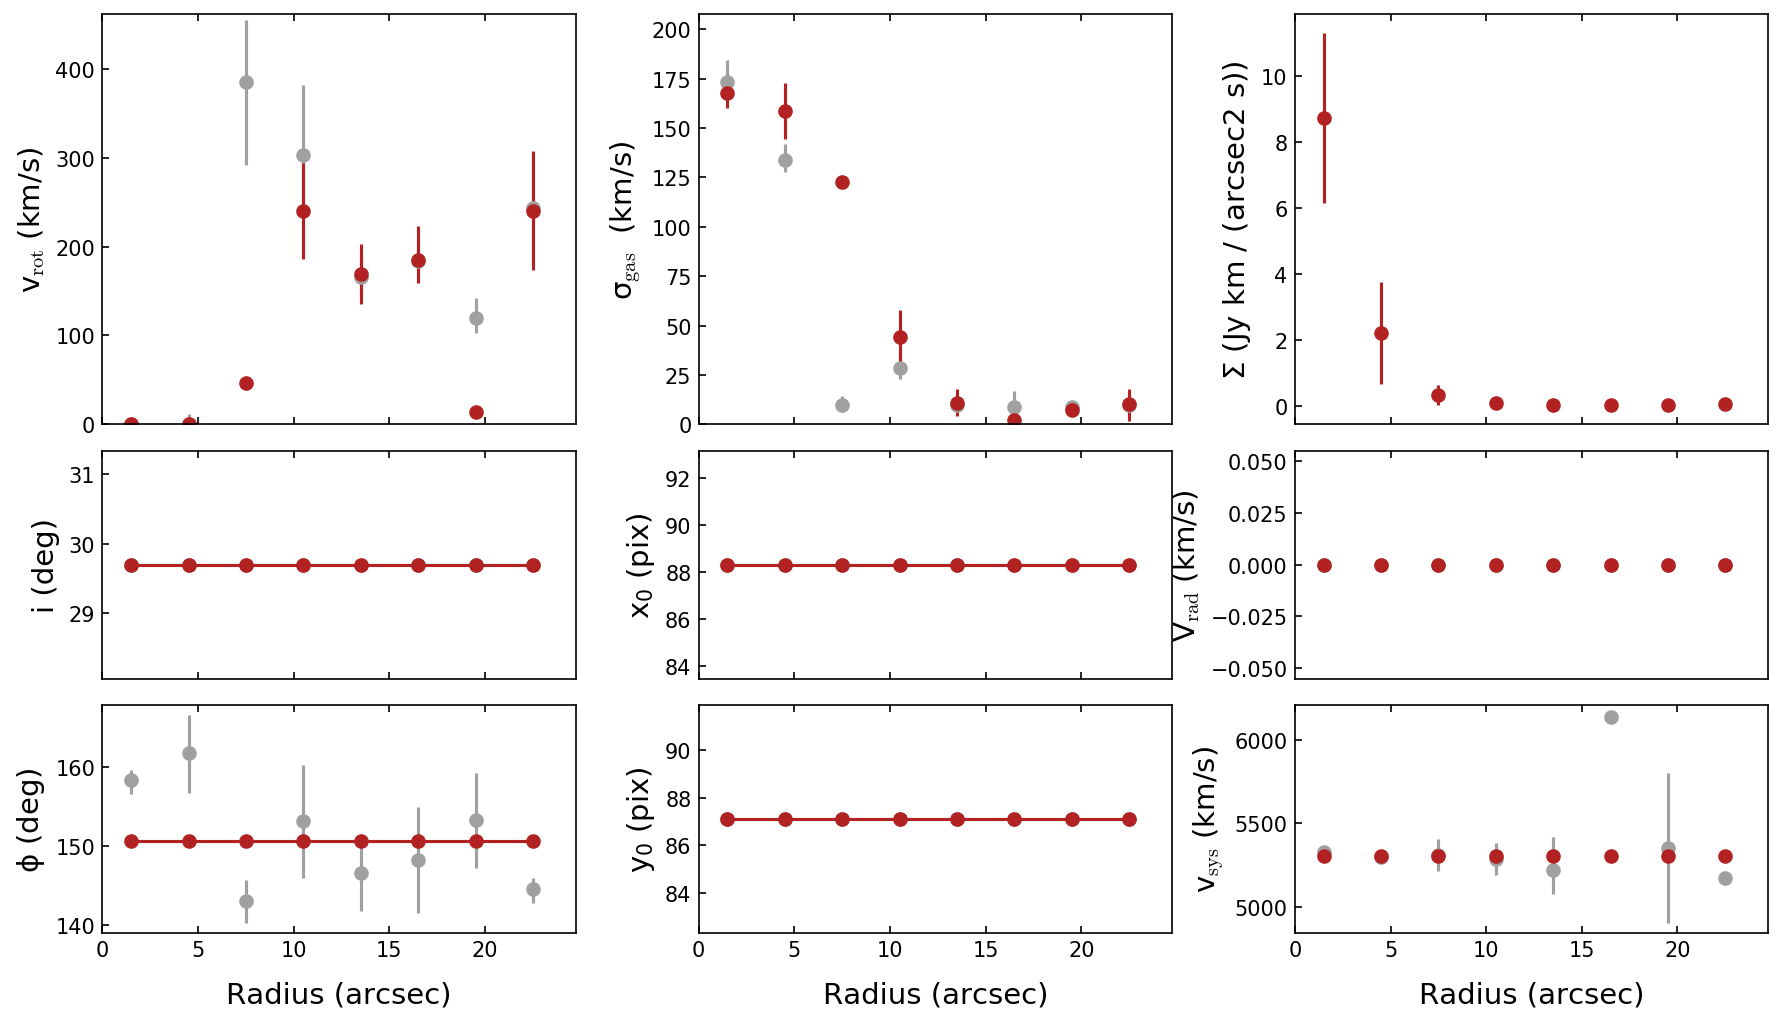

In [50]:
#example
plotparam('ARP220', 'gal_nrad8.txt')

NGC3303 has no densprof available


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


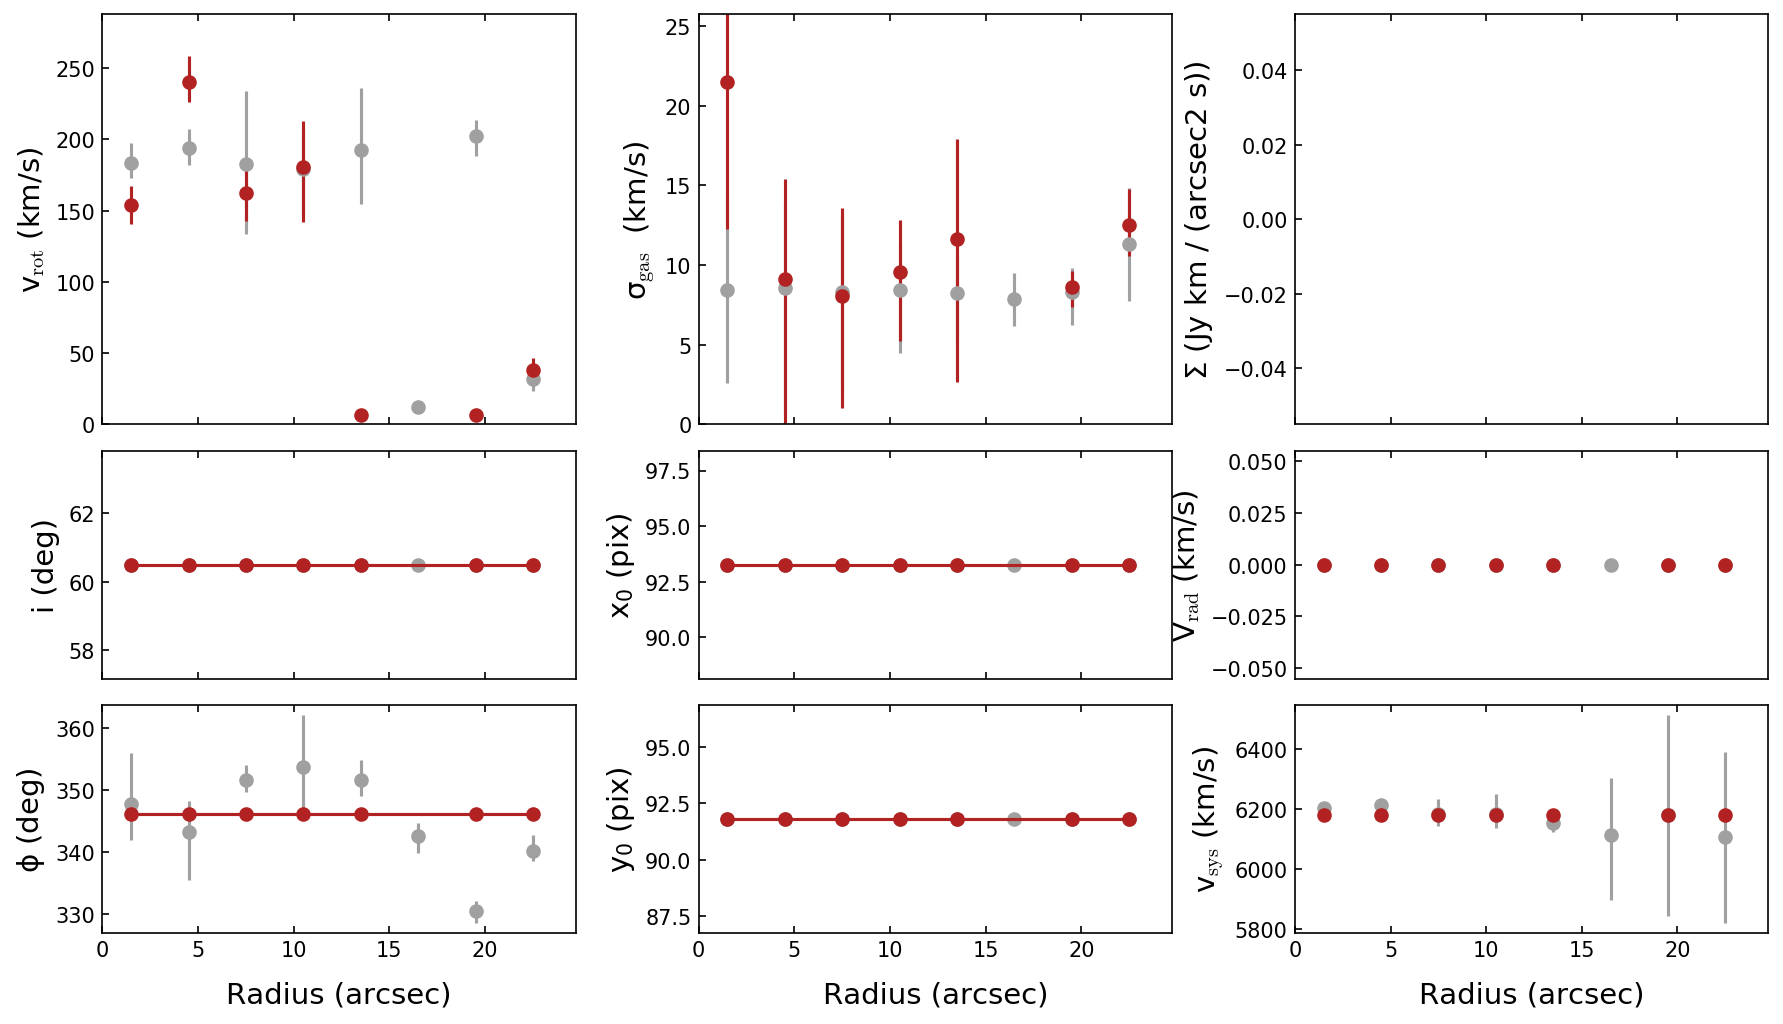

In [54]:
plotparam('NGC3303', 'gal_nrad8.txt')